# Classification

* Based on incomplete information
*One way of making predictions:
 - To predict an outcome for an individual,
 - find others who are like that individual
 - and whose outcomes you know.
Use those outcomes as the basis of your prediction.

Two Types of Prediction
Regression = Numeric; Classification = Categorical


In [ ]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from google.colab import files

In [ ]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [ ]:
def adjust_length(point1, point2):
    """
    Adjusts the lengths of two points to be equal by truncating the longer one.
    """
    min_length = min(len(point1), len(point2))
    return point1[:min_length], point2[:min_length]

# Usage inside the distance function
def distance(point1, point2):
    """
    The distance between two arrays of numbers with dimension adjustment.
    """
    point1, point2 = adjust_length(point1, point2)
    return np.sqrt(np.sum((point1 - point2) ** 2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop(columns=['Class'])
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point, axis =1)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    distances = all_distances(training, point)

    # Add the distances as a new column to the DataFrame
    training['Distance'] = distances
    return training

def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort_values(by='Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses[topkclasses['Class'] == 1].shape[0]
    zeros = topkclasses[topkclasses['Class'] == 0].shape[0]
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk[['Class']]
    majority_class = topkclasses['Class'].mode()[0]
    return majority_class

def show_closest(point):
    """
    point = array([x, y])
    gives the coordinates of a new point shown in red
    """
    # Drop unnecessary columns
    HemoGl = ckd[['Hemoglobin', 'Glucose', 'Class', 'Color']]

    # Calculate Euclidean distances to the point
    HemoGl['Distance'] = np.sqrt((HemoGl['Hemoglobin'] - point[0])**2 + (HemoGl['Glucose'] - point[1])**2)

    # Find the closest point
    closest_point = HemoGl.loc[HemoGl['Distance'].idxmin()]

    # Extract coordinates of the closest point
    x_closest = closest_point['Hemoglobin']
    y_closest = closest_point['Glucose']

    # Scatter plot of Hemoglobin vs Glucose grouped by Color
    plots.figure(figsize=(8, 6))
    scatter = plots.scatter(ckd['Hemoglobin'], ckd['Glucose'], c=ckd['Color'], edgecolor='k')

    # Plot the new point in red
    plots.scatter(point[0], point[1], color='red', s=30, label='New Point')

    # Plot a line connecting the new point to the closest point
    plots.plot([point[0], x_closest], [point[1], y_closest], color='k', lw=2, label='Closest Line')

    # Add labels and title
    plots.xlabel('Hemoglobin')
    plots.ylabel('Glucose')
    plots.title('Closest Point Visualization')
    plots.legend()
    plots.show()


In [ ]:
def plot_all_points(test_grid):
    plots.scatter(test_grid['Hemoglobin'], test_grid['Glucose'], color='red', alpha=0.4, s=30, label='Test Grid')

    # Plotting points from `ckd` with color and edge color
    plots.scatter(ckd['Hemoglobin'], ckd['Glucose'], c=ckd['Color'], edgecolor='k', cmap='viridis', label='CKD Data')

    # Set axis limits
    plots.xlim(-2, 2)
    plots.ylim(-2, 2)


    # Show the plot
    plots.grid(True)
    plots.colorbar(label='Color')  # Add color bar if 'Color' is used for color mapping

    # Set plot labels and title
    plots.xlabel('Hemoglobin')
    plots.ylabel('Glucose')
    plots.title('Grid of All Points')
    plots.grid(True)
    plots.show()


def classify_grid(training, test, k):
    c = []

    for i in range(len(test)):
        # Extract the ith row from the test DataFrame and convert to array
        test_row = test.iloc[i].to_numpy()

        # Classify the ith test row using the training data
        result = classify(training, test_row, k)

        # Append the result to the list
        c.append(result)

      # Convert the list to a numpy array if needed
    c = np.array(c)
    return c

def plot_all_points_classified(test_grid):
    """
    Classify and plot all points from the test grid DataFrame.
    The points are classified based on the nearest neighbor in the ckd DataFrame.
    """
    # Classify points in the grid using the classifier
    c = classify_grid(ckd[['Hemoglobin', 'Glucose', 'Class']], test_grid, 1)

    # Add the classification results to the test grid DataFrame
    test_grid['Class'] = c

    # Merge test_grid with the color table on the 'Class' column
    test_grid = test_grid.merge(color_table, on='Class', how='left')

    # Scatter plot of the classified grid points
    plots.figure(figsize=(8, 6))
    plots.scatter(test_grid['Hemoglobin'], test_grid['Glucose'], c=test_grid['Color'], alpha=0.4, s=30, edgecolor='k')

    # Scatter plot of the original data points from ckd
    plots.scatter(ckd['Hemoglobin'], ckd['Glucose'], c=ckd['Color'], edgecolor='k', s=50, label='Original Data')

    # Set plot limits and labels
    plots.xlim(-2, 2)
    plots.ylim(-2, 2)
    plots.xlabel('Hemoglobin')
    plots.ylabel('Glucose')
    plots.title('Classified Grid of All Points')
    plots.grid(True)
    plots.legend()
    plots.show()

# Classifying Patients Example

In [ ]:
#upload the file  ckd.csv   #
uploaded=files.upload()

Saving ckd.csv to ckd.csv


In [ ]:
#Read the file ckd.csv
ckd = pd.read_csv('ckd.csv')
ckd

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


In [ ]:
# Rename the column 'Blood Glucose Random' to 'Glucose'
ckd = ckd.rename(columns={'Blood Glucose Random': 'Glucose'})
ckd.head(5)

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [ ]:
# Group by class
grouped_ckd = ckd.groupby('Class')

# To see the groups and perform aggregation, you can use aggregation functions like `count`, `mean`, etc.
# For example, to count the number of occurrences in each group:
group_counts = grouped_ckd.size()
group_counts

,0
Class,
0,115
1,43


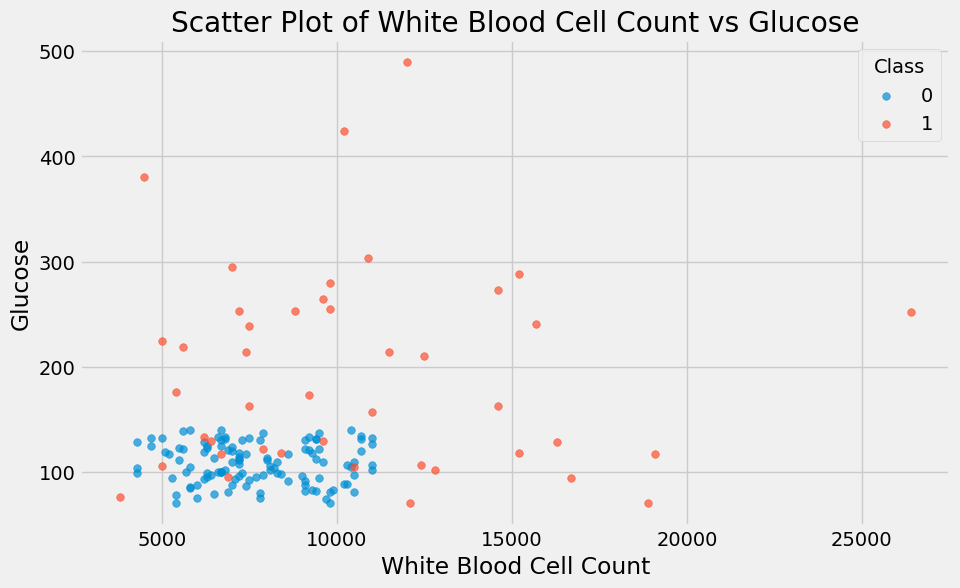

In [ ]:
# Create a scatter plot with color by group
plots.figure(figsize=(10, 6))

# Group by 'Class' and plot each group with a different color
for name, group in ckd.groupby('Class'):
    plots.scatter(group['White Blood Cell Count'], group['Glucose'], label=name, alpha=0.7, s=30)

# Add labels, title, legend, and grid
plots.xlabel('White Blood Cell Count')
plots.ylabel('Glucose')
plots.title('Scatter Plot of White Blood Cell Count vs Glucose')
plots.legend(title='Class')
plots.grid(True)

# Show the plot
plots.show()

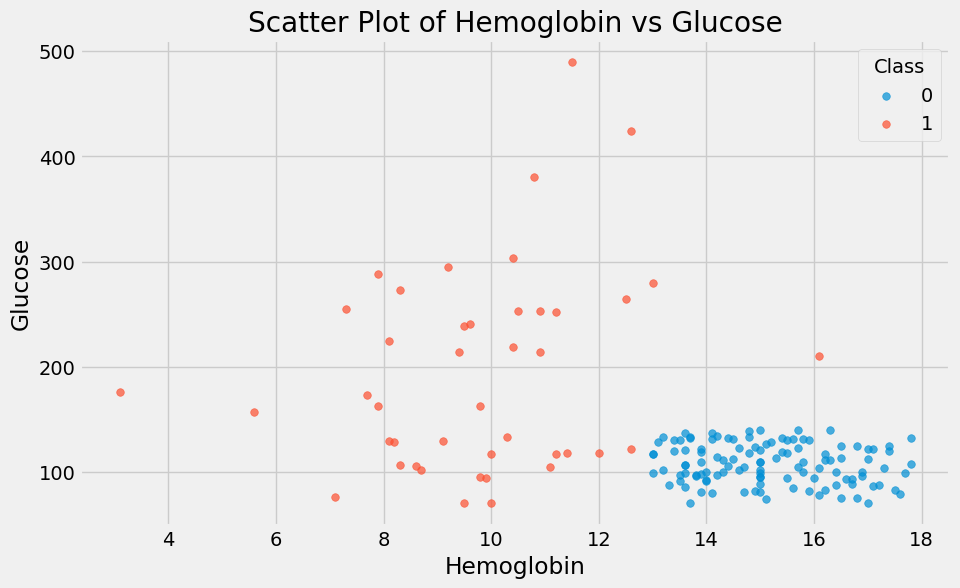

In [ ]:
# Create a scatter plot with color by group
plots.figure(figsize=(10, 6))

# Group by 'Class' and plot each group with a different color
for name, group in ckd.groupby('Class'):
    plots.scatter(group['Hemoglobin'], group['Glucose'], label=name, alpha=0.7, s=30)

# Add labels, title, legend, and grid
plots.xlabel('Hemoglobin')
plots.ylabel('Glucose')
plots.title('Scatter Plot of Hemoglobin vs Glucose')
plots.legend(title='Class')
plots.grid(True)

# Show the plot
plots.show()

In [ ]:
# we want to be able to way to predict the class of someone
# without having to plot & eye ball this graph every time.
#
# one way to do this is to put some thresholds into code

# Calculate thresholds for Class 0
max_glucose_for_0 = ckd[ckd['Class'] == 0]['Glucose'].max()
min_hemoglobin_for_0 = ckd[ckd['Class'] == 0]['Hemoglobin'].min()

# Define thresholds for other classes if necessary
# For example, if Class 1
# max_glucose_for_1 = ckd[ckd['Class'] == 1]['Glucose'].max()
# min_hemoglobin_for_1 = ckd[ckd['Class'] == 1]['Hemoglobin'].min()

# Function to predict class based on thresholds
def predict_class(glucose, hemoglobin):
    if glucose <= max_glucose_for_0 and hemoglobin >= min_hemoglobin_for_0:
        return 0
    # Add more conditions if there are other classes
    # elif some_other_condition:
    #     return 1
    else:
        return 'Unknown'  # or some default value or handling for unknown cases

# Example usage
glucose_input = 120  # Replace with actual input value
hemoglobin_input = 14  # Replace with actual input value
predicted_class = predict_class(glucose_input, hemoglobin_input)

print(f'Predicted Class: {predicted_class}')

Predicted Class: 0


In [ ]:
def classify_manually(hemoglobin, glucose):
    if hemoglobin < min_hemoglobin_for_0 or glucose > max_glucose_for_0:
        return 1
    else:
        return 0

In [ ]:
# Let's try our classifier!
classify_manually(15, 100)

0

In [ ]:

classify_manually(10, 300)

1

# Classifying Banknotes Example







In [ ]:
#upload the file  banknote.csv   #
uploaded=files.upload()

Saving banknote.csv to banknote.csv


In [ ]:
#Read the file banknote.csv
banknotes = pd.read_csv('banknote.csv')
banknotes

,WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
# Group by class
grouped_banknotes = banknotes.groupby('Class')

# To see the groups and perform aggregation, you can use aggregation functions like `count`, `mean`, etc.
# For example, to count the number of occurrences in each group:
group_counts = grouped_banknotes.size()
group_counts

,0
Class,
0,762
1,610


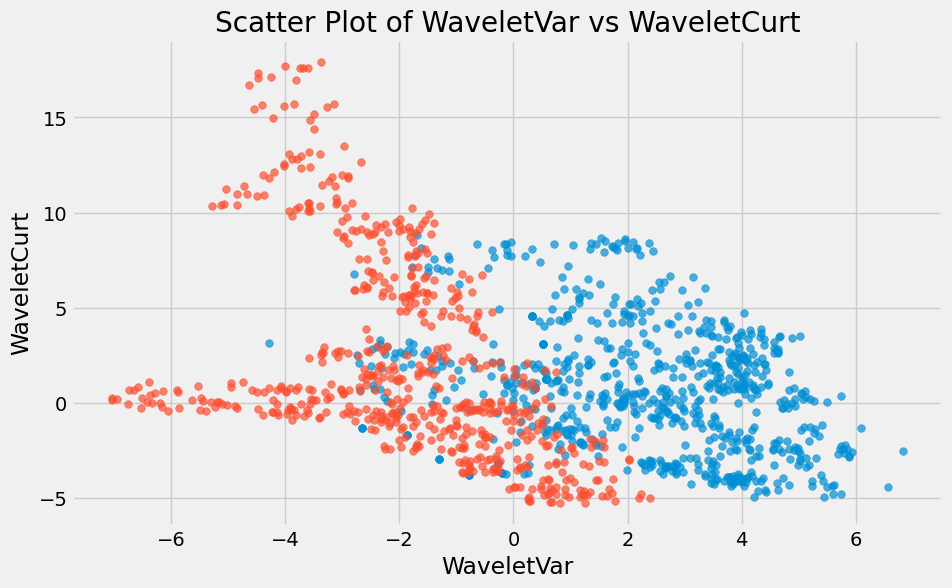

In [ ]:
# Create a scatter plot with color by group
plots.figure(figsize=(10, 6))

# Group by 'Class' and plot each group with a different color
for name, group in banknotes.groupby('Class'):
    plots.scatter(group['WaveletVar'], group['WaveletCurt'], label=name, alpha=0.7, s=30)

# Add labels, title, legend, and grid
plots.xlabel('WaveletVar')
plots.ylabel('WaveletCurt')
plots.title('Scatter Plot of WaveletVar vs WaveletCurt')
plots.grid(True)

# Show the plot
plots.show()

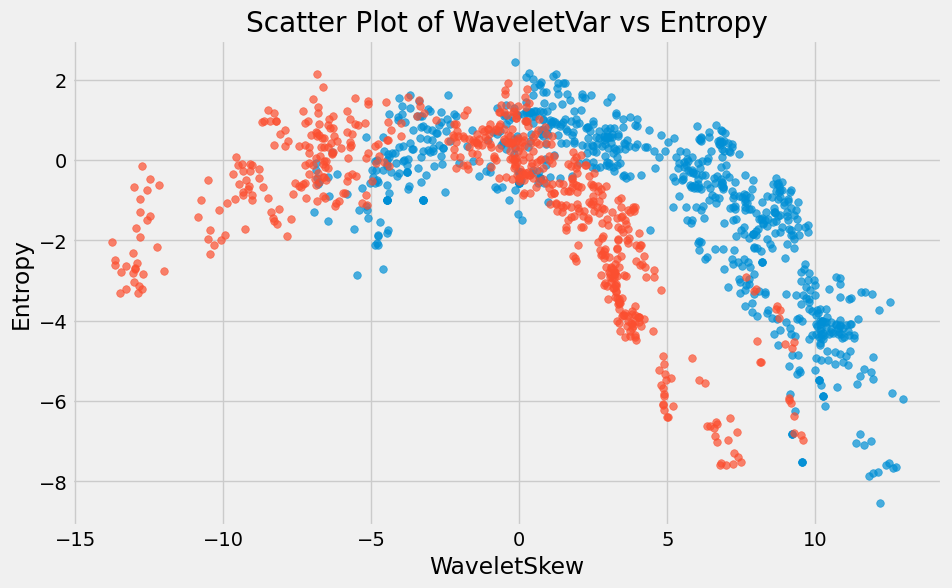

In [ ]:
# Create a scatter plot with color by group
plots.figure(figsize=(10, 6))

# Group by 'Class' and plot each group with a different color
for name, group in banknotes.groupby('Class'):
    plots.scatter(group['WaveletSkew'], group['Entropy'], label=name, alpha=0.7, s=30)

# Add labels, title, legend, and grid
plots.xlabel('WaveletSkew')
plots.ylabel('Entropy')
plots.title('Scatter Plot of WaveletVar vs Entropy')
plots.grid(True)

# Show the plot
plots.show()

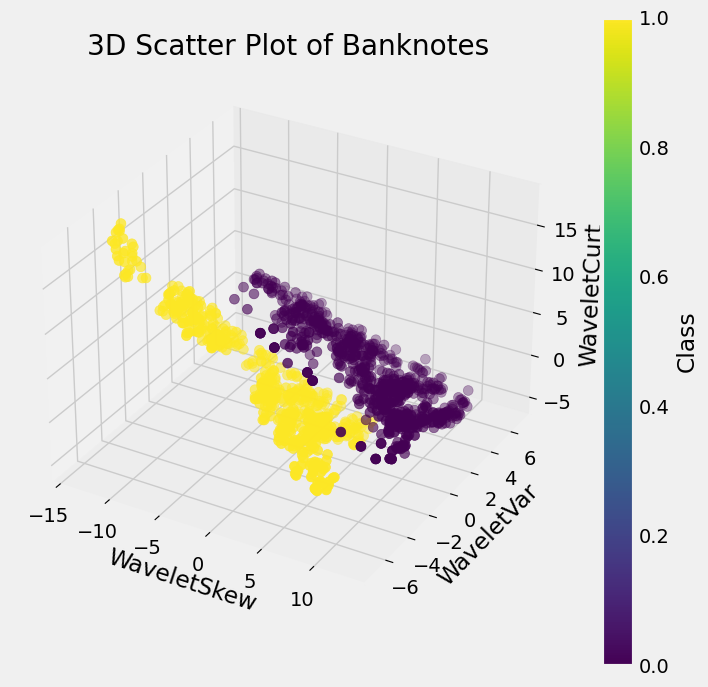

In [ ]:
# Create a figure and a 3D axis
fig = plots.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(banknotes['WaveletSkew'],
                banknotes['WaveletVar'],
                banknotes['WaveletCurt'],
                c=banknotes['Class'],
                cmap='viridis',
                s=50)

# Add color bar
cbar = plots.colorbar(sc, ax=ax, label='Class')

# Add labels and title
ax.set_xlabel('WaveletSkew')
ax.set_ylabel('WaveletVar')
ax.set_zlabel('WaveletCurt')
ax.set_title('3D Scatter Plot of Banknotes')

# Show plot
plots.show()

# Nearest Neighbor Classifer

In [ ]:
# Define the standardization function


# Apply standardization to relevant columns
ckd['Hemoglobin'] = standard_units(ckd['Hemoglobin'])
ckd['Glucose'] = standard_units(ckd['Glucose'])
ckd['White Blood Cell Count'] = standard_units(ckd['White Blood Cell Count'])

# The 'Class' column remains unchanged
# You can check the result with ckd.head()
#print(ckd.head())

In [ ]:
# Create the color mapping table as a DataFrame
color_table = pd.DataFrame({
    'Class': [0, 1],
    'Color': ['darkblue', 'gold']
})

# Merge `ckd` with `color_table` on the 'Class' column
ckd = ckd.merge(color_table, on='Class', how='left')

# Display the updated DataFrame to verify
#print(ckd.head())

In [ ]:
ckd

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,...,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,Color
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,-0.220847,...,-0.567962,3.9,yes,no,no,poor,yes,yes,1,gold
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,-0.944594,...,1.158999,3.7,yes,yes,no,poor,no,yes,1,gold
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,3.829056,...,-1.271539,3.8,yes,yes,no,poor,yes,no,1,gold
3,68,80,1.010,3,2,normal,abnormal,present,present,0.395108,...,0.807211,2.6,yes,yes,yes,poor,yes,no,1,gold
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,0.641490,...,0.231557,3.2,yes,yes,yes,poor,yes,yes,1,gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,0.133327,...,-0.567962,4.9,no,no,no,good,no,no,0,darkblue
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,-0.867600,...,-0.216174,6.2,no,no,no,good,no,no,0,darkblue
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,-0.482628,...,-0.599943,5.4,no,no,no,good,no,no,0,darkblue
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,-0.267044,...,-0.408058,5.9,no,no,no,good,no,no,0,darkblue


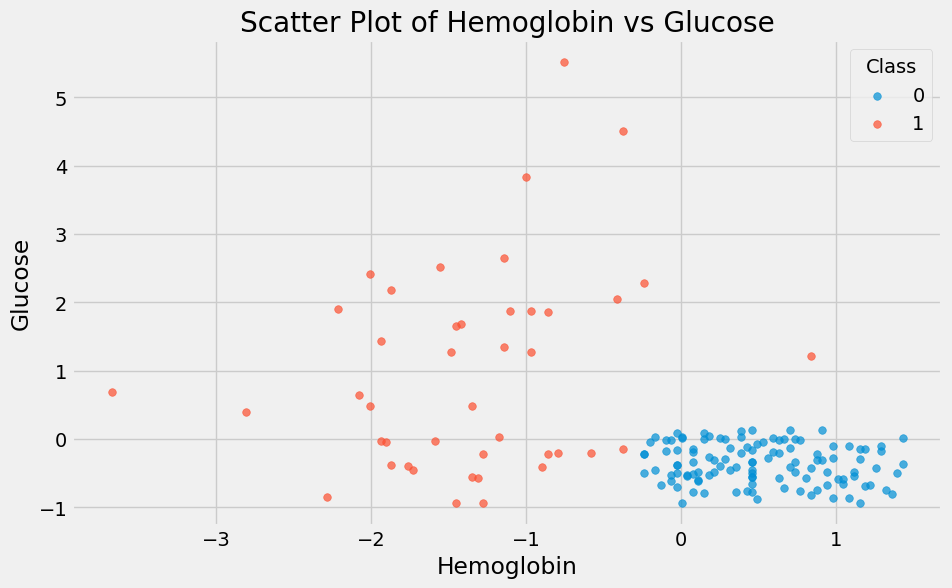

In [ ]:
# Create a scatter plot with color by group
plots.figure(figsize=(10, 6))

# Group by 'Class' and plot each group with a different color
for name, group in ckd.groupby('Class'):
    plots.scatter(group['Hemoglobin'], group['Glucose'], label=name, alpha=0.7, s=30)

# Add labels, title, legend, and grid
plots.xlabel('Hemoglobin')
plots.ylabel('Glucose')
plots.title('Scatter Plot of Hemoglobin vs Glucose')
plots.legend(title='Class')
plots.grid(True)

# Show the plot
plots.show()

<ipython-input-84-33da60186e83>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HemoGl['Distance'] = np.sqrt((HemoGl['Hemoglobin'] - point[0])**2 + (HemoGl['Glucose'] - point[1])**2)


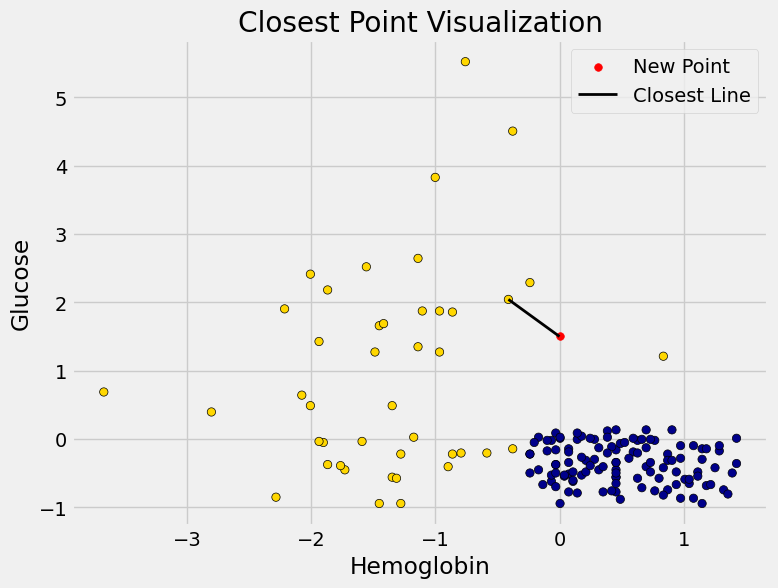

In [ ]:
# In this example, Alice's Hemoglobin is 0 and her Glucose is 1.5.
alice = np.array([0, 1.5])
show_closest(alice)

# Decision Boundary

In [ ]:
# Define the range and step size for creating the grid
x_values = np.arange(-2, 2.1, 0.1)
y_values = np.arange(-2, 2.1, 0.1)

# Create a meshgrid of x and y values
x_array, y_array = np.meshgrid(x_values, y_values)

# Flatten the arrays to create a list of all coordinate points
x_array = x_array.flatten()
y_array = y_array.flatten()

# Create the DataFrame with the grid points
test_grid = pd.DataFrame({
    'Hemoglobin': x_array,
    'Glucose': y_array
})

# Display the first few rows of the DataFrame to verify
#print(test_grid.head())

   Hemoglobin  Glucose
0        -2.0     -2.0
1        -1.9     -2.0
2        -1.8     -2.0
3        -1.7     -2.0
4        -1.6     -2.0


<ipython-input-80-c0bc478c33ea>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plots.scatter(ckd['Hemoglobin'], ckd['Glucose'], c=ckd['Color'], edgecolor='k', cmap='viridis', label='CKD Data')


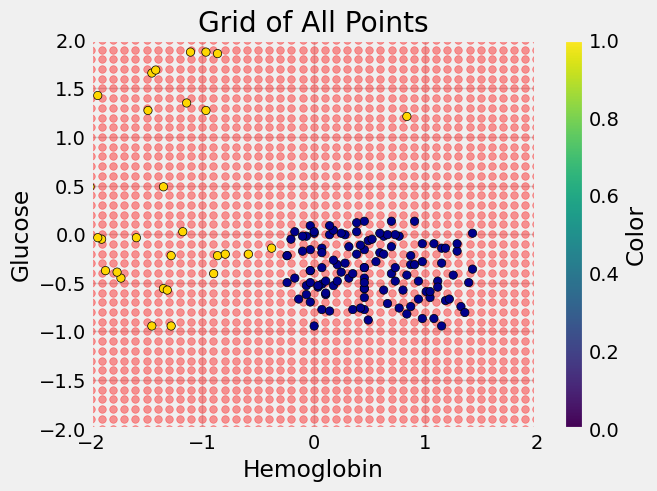

In [ ]:
plot_all_points(test_grid)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Distance'] = distances
<ipython-input-84-33da60186e83>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Distance'] = distances
<ipython-input-84-33da60186e83>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['Distance'] = distances
<ipython-input-84-33da60186e83>:28: SettingWithCopyWarnin

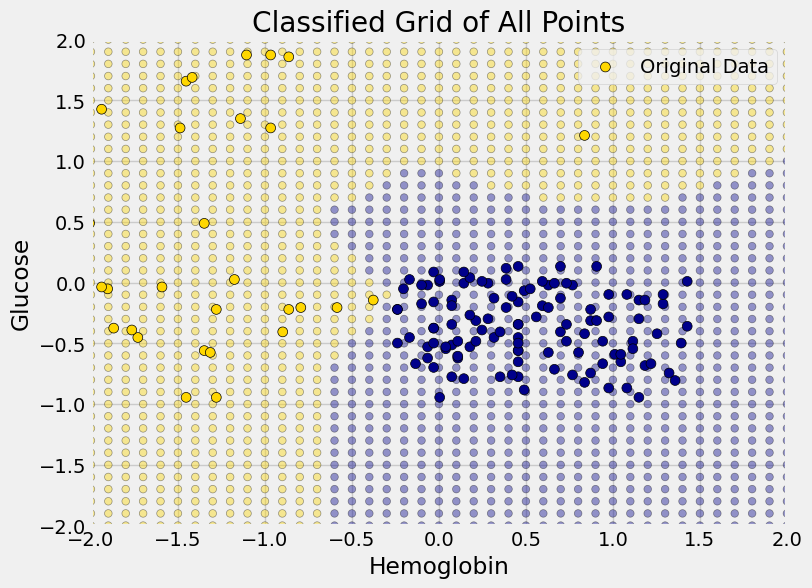

In [ ]:
plot_all_points_classified(test_grid)